# Empalme con la clase anterior


## Kernel Trick:
Sabemos que para separar datos no linealmente separables debemos mover los puntos a una hier-superficie en un espacio de mayor dimension que donde estan los datos originalmente.
La condicion para separar los puntos es

$$y_i \left (  \sum_j \lambda_j y_j x_j \cdot x_i - b)  \right ) \ge 1$$

Vemos que toca hacer los productos $x_i \cdot x_j$ muchas veces. Estos puntos se van a mapear a un espacio de mayores dimensiones, por un "kernel"
$x_i \mapsto \Phi(x_i)$
Llamos kernel a la siguiente function

$$k(x_i, x_j) = \Phi(x_i) \cdot \Phi(x_j) $$

Esto se va a tener que calcular muchas veces. Isabelle Guyon en 1991 invento una forma de calcular estos **kernels** de una forma rapida. A esto se llamo el **kernel trick**.
[enlace aca](https://en.wikipedia.org/wiki/Kernel_method).
Este **truco** permitio un computo mucho mas veloz de las operaciones que envuelve el metodo de SVM.

La funcion $\Phi$ se le llama el **feature map** (mapeo)
Vamos a ver una serie de ejemplos donde probamos que
mediante el kernel trick es mas rapido hacer los calculos.

**Ejemplo 1**:
Tomemos $n=2$ (el espacio es de dos dimensiones)
Definamos el **feature map** como

\begin{eqnarray}
\Phi : \mathbb{R}^2 &\to& \mathbb{R}^3  \\
(x_1, x_2) &\mapsto& \Phi(x_1, x_2) = (x_1^2 , x_2^2, \sqrt{2} x_1 x_2)
\end{eqnarray}
De acuerdo a esto

El truco es este:
$$k(x,y) = ( x \cdot y)^2 $$

Vamos a probar que en verdad $k(x,y) = \Phi(x) \cdot \Phi(y)$
Veamos. Tomemos $x=(x_1, x_2)$, $y=(y_1, y_2)$, entonces

$$k(x,y) = (x \cdot y)^2 = \left ( \sum_{i=1}^2 x_i y_i   \right )^2 =
x_1^2 y_1^2 + 2 x_1 x_2 y_1 y_2 + x_2^2 y_2^2 $$

Comparamos esto con

$$\Phi(x) \cdot \Phi(y) = (x_1^2, x_2^2, \sqrt{2} x_1 x_2) \cdot (y_1^2, y_2^2, \sqrt{2} y_1 y_2) = x_1^2 y_1^2 + 2 x_1 x_2 y_1 y_2 + x_2^2 y_2^2 $$







Contemos operaciones: (toy)
* $k(x,y)=(x \cdot y)^2$
para $x \cdot y$ se necesitan: 2 multiplicaciones y una suma.
Sumele un cuadrado y pare de contar.
* $\Phi(x) \cdot \Phi(y)$. Entonces para $\Phi(x)$, dos cuadrados y dos multiplicaciones y lo mismo para $\Phi(y)$ y luego el producto punto se necesitan 3 multiplicaciones y 2 sumas.
Es mas del doble de operaciones. En la vida real no es 2 o 3 dimensiones sino muchisimas mas.



    

**Ejemplo 2**:
Pensemos en $n=3$, y definamos

\begin{eqnarray}
\Phi : \mathbb{R}^3 &\to& \mathbb{R}^6 \\
(x_1, x_2, x_3) &\mapsto& = (x_1^2, x_2^2, x_3^2, \sqrt{2} x_1 x_2, \sqrt{2} x_1 x_3, \sqrt{2} x_2 x_3)
\end{eqnarray}

El **kernel trick** es:

$$ k(x,y)= (x \cdot y)^2 $$

Veamos como este computo es mucho mas rapido que el tradicional.
Si $x=(x_1, x_2, x_3)$, $y=(y_1, y_2, y_3)$.

$$k(x,y) = (x \cdot y)^2 = \left ( \sum_{i=1}^3 x_i y_i \right )^2  = \sum_{i=1}^3 \sum_{j=1}^3 x_i x_j y_i y_j $$

De otro lado

$$\Phi(x) \cdot \Phi(y) =
(x_1^2, x_2^2, x_3^2, \sqrt{2} x_1 x_2, \sqrt{2} x_1 x_3, \sqrt{2} x_2 x_3) \cdot
(y_1^2, y_2^2, y_3^2, \sqrt{2} y_1 y_2, \sqrt{2} y_1 y_3, \sqrt{2} y_2 y_3) =\sum_{i=1}^3 \sum_{j=1}^3 x_i x_j y_i y_j
 $$

Cuentas de calculo
* $k(x,y)$:
necesitamos 3 multiplicaciones y dos sumas para $x \cdot y$ y un cuadrado y pare de contar.

* $\Phi(x) \cdot \Phi(y)$: 12 multiplicaciones y 6 cuadrados para $\Phi(x)$ y $\Phi(y)$. El product interno da 6 multiplicaciones y 5 sumas.

* **Ejemplo 3**:
Sea $c \in \mathbb{R}$, $x, y \in \mathbb{R}^3$
definamos

$k(x,y) = ( x \cdot y  + c)^2$


\begin{eqnarray}
k(x,y) &=&  \left ( \sum_{i=1}^3 x_i y_i + c  \right )
 \left ( \sum_{i=1}^3 x_i y_i + c  \right ) \\
 &=& \sum_{i=1}^3 \sum_{j=1}^3 x_i x_j y_i y_j + 2 c \sum_{i=1}^3 x_i y_i + c^2
\end{eqnarray}

Ahora definamos

\begin{eqnarray}
\Phi: \mathbb{R}^3 &\to& \mathbb{R}^{10}  \\
(x_1, x_2, x_3) &\mapsto& (x_1^2, x_2^2, x_3^2, \sqrt{2} x_1 x_2, \sqrt{2} x_1 x_3, \sqrt{2} x_2 x_3, \sqrt{2}c x_1, \sqrt{2} c x_2, \sqrt{2} x_3, c)
\end{eqnarray}

Se puede ver (tarea para los estudiantes)
que

$$k(x,y) = \Phi(x) \cdot \Phi(y) $$

Vamos a contar operaciones:
* Para el mapeo $\Phi$, se puede ahorrar computos guardando en la memoria $c \sqrt{2}$. Da 18 multiplicaciones para $x$ y 18 multiplicaciones para $y$ (total de 36 multiplicaciones), 6 cuadrados. Agrega 10 multiplicaciones y 9 sumas.

* Para $k(x,y)$: 3 multiplicaciones, 3 sumas y un cuadrado.



* **Ejemplo 4**: asuma $d$ dimensiones $d > 2 \in \mathbb{N}$
considere el kernel trick

$$k(x,y) = ( x \cdot y + c)^d \quad, \quad c \in \mathbb{R} $$

Este kernel satisface

$$ k(x,y)  = \Phi(x) \cdot \Phi(y) $$
donde $\Phi$ es un mapeo que se deja como ejercicio.
Se dejan unas "hints" (ayudas).

$$\Phi: \mathbb{R}^n \to \mathbb{R}^p $$

donde
$$ p = \binom{n+d}{d} $$


* **Kernel Gaussiano**:
Defina el Kernel trick como

$$ k(x_i, y_j) = \mathrm{e}^{- \frac{(x_i - x_j)^2}{2 \sigma^2}}$$

Donde $x_i, x_j \in \mathbb{R}^n$ y

$$(x_i - x_j)^2 = \| x_i - x_j \|^2 = (x_i - x_j)^T (x_i - x_j) = \langle x_i - x_j, x_i - x_j \rangle = (x_i - x_j) \cdot (x_i - x_j) $$

Que es $\sigma$? En la practica si la distribucion Gaussiana
$\sigma$ en vez de ser un escalar como aca, seria una matriz de covarianza $\Sigma$ (dividiendo $\Sigma^{-1}$).

Una pregunta intersante es, si este es el "kernel trick" entonces encuentre el "feature mapping" $\Phi$?

Para esto necesitamos recordar de calculo

$$\mathrm{e}^\theta = 1 + \theta + \frac{\theta^2}{2!} + \frac{1}{3!} \theta^3 \cdots + \frac{\theta^n}{n!} + \cdots  $$

Para facilitar los calculos vamos a asumir que $x_i, x_j \in \mathbb{R}$.

Entonces


\begin{eqnarray}
\mathrm{e}^{- \frac{(x_i - x_j)^2}{2 \sigma^2} }
&=& \mathrm{e}^{-\frac{x_i^2 + x_j^2}{2 \sigma^2}} \mathrm{e}^{\frac{x_i x_j}{\sigma^2}} \\
&=&\mathrm{e}^{-\frac{x_i^2 + x_j^2}{2 \sigma^2}}  
\left (
(1)(1)  + \frac{x_i x_j}{\sigma^2} + \frac{1}{2!} \left ( \frac{x_i x_j}{\sigma^2}^2 \right ) + \frac{1}{3!} \left (
    \frac{x_i x_j}{\sigma^2} \right )^3 +
    \cdots + \frac{1}{n!} \left (
       \frac{x_i x_j}{\sigma^2} \right )^n
\cdots \right )  \\
&=& \mathrm{e}^{-\frac{x_i^2 + x_j^2}{2 \sigma^2}}
\left ( (1) (1) + \frac{x_i}{\sigma} \frac{x_j}{\sigma} +
\frac{x_i^2}{\sqrt{2!} \sigma^2}  \frac{x_j^2}{\sqrt{2!} \sigma^2}
+ \frac{x_i^3}{\sqrt{3!} \sigma^3} \frac{x_j^3}{\sqrt{3!} \sigma^2}
+ \cdots + \frac{x_i^n}{\sqrt{n!}\sigma^n} \frac{x_j^n}{\sqrt{n!} \sigma^n}
    \cdots \right )
\end{eqnarray}

Se predice que

$$\Phi(x) =\mathrm{e}^{-\frac{x^2}{2 \sigma^2}}
\left ( 1, \frac{x}{\sigma}, \frac{x^2}{\sqrt{2!} \sigma^2},
\frac{x^3}{\sqrt{3!} \sigma^3} \cdots,
\frac{x^n}{\sqrt{n!} \sigma^n} \cdots,   \right ) $$
$$\Phi(y) =\mathrm{e}^{-\frac{y^2}{2 \sigma^2}}
\left ( 1, \frac{y}{\sigma}, \frac{y^2}{\sqrt{2!} \sigma^2},
\frac{y^3}{\sqrt{3!} \sigma^3} \cdots,
\frac{y^n}{\sqrt{n!} \sigma^n} \cdots,   \right ) $$

Algunas propiedades el kernel trick

* Es simetrico: $k(x,y) = k(y,x)$. O sea que la matrix
$(K)_{ij} = k(x_i, x_j)$ es una matriz simetrica.

* Dado que $K$ es una matriz simetrica es diagonalizable.
Es decir existe una matriz $\Lambda$ con los autovalores de $K$
$(\Lambda)_{ii}=\lambda_i$, (matriz diagonal). Los autovectores de $K$ forman una matriz $U$, donde cada columna de $U$ es un autovector. Entonces

$$K = U \Lambda U^T $$
Si todos los autovalores son positivos o 0, $K$ es no negativa definida.  Podemos escribir

Tarea, para ya, encontrar el feature mapping $\Phi$.
\begin{eqnarray}
k_{ij} &=& \sum_{l=1}^m u_{il} \lambda_l u_{jl} \\
&=& \sum_{l=1}^m \sqrt{\lambda_l} u_{il} \sqrt{\lambda_l} u_{jl} \\
&=& ( \sqrt{\lambda_1} u_{i1}, \sqrt{\lambda_2} u_{i2},
\cdots, \sqrt{\lambda_m} u_{im})  \cdot
 ( \sqrt{\lambda_1} u_{j1}, \sqrt{\lambda_2} u_{j2},
 \cdots , \sqrt{\lambda_m} u_{jm})
\end{eqnarray}

Claramente se ve que el "feature mapping" es:

\begin{eqnarray}
\Phi : \mathbb{R}^n & \to & \mathbb{R}^m \\
x^{(i)} &\mapsto& ( \sqrt{\lambda_1} u_{i1}, \sqrt{\lambda_2} u_{i2}, \cdots, \sqrt{\lambda_m} u_{im})
\end{eqnarray}
De forma que

$$(K)_{ij} = k(x^{(i)}, y^{(j)}) = \Phi(x^{(i)}) \cdot \Phi(x^{(j)}) $$

A la matriz $(K)_{ij}$ se llama la **Gram matrix**.
[Wiki tiene este enlace](https://en.wikipedia.org/wiki/Gram_matrix).


Si $K$ no es negativa definida entonces existe un feaure mapping $\Phi$, tal que $k(x,y) = \Phi(x) \cdot \Phi(y)$ (ya lo probamos).

Del otro lado, si $k(x,y) = \Phi(x) \cdot \Phi(y)$ para algun feature mapping $\Phi$ entonces para $c \in \mathbb{R}^m$

$$c^T K c = \sum_i \sum_j c_i c_j k(x_i , y_j) = \sum_i \sum_j c_i c_j \Phi(x_i) \cdot \Phi(x_j) = \sum_i c_i \Phi(x_i) \cdot \sum_j c_j \Phi(x_j) = \left \| \sum_i c_i \Phi(x_i) \right \|^2  \ge 0 $$

En resumen (estudiamos los siguientes kerneles:

* Kenel lineal:
$x,y \in \mathbb{R}^n$, $c \in \mathbb{R}$.
$$k(x,y) = x \cdot y + c $$

* Polynomial kernel:
$$k(x,y) = (x \cdot y + c)^d $$

* Gaussian Kernel:

$$k(x,y) = \mathrm{e}^{- \frac{\| x - y \|^2}{2 \sigma^2}} $$


Hay mas temas supervisados que no alcanzamos a estudiar aca:

* Decision trees: Arboles de decision
* Random forests: Arboles aleatorios

Pasamos a
# Metodos no supervisados
Vamos a ver varios temas:

1. Clustering (agrupamiento)
    * kmeans  (solo este lo estudiamos)
    * dbscan (Density solo para comparar)
    * Hdbscan (Hierachical solo para comparar)

2. Reduccion de dimensionalidad. PCA(Principal component analysis). Aca recordaremos el teorema de SVD.

3. Deteccion de anomalias (anomaly detection)

### Semisupervisado.
4. ORC y recommender systems (sistemas de recomendacion: Netflix, Amazon, YouTube, Spotiy, PrimeVideo, etc.) Este es



El apredizaje no supervisado no tiene etiquetas.
Tiene la ventaja de que no se necesita trabajo humano, pero tambien se desconocen atributos que nos ayude a precisar mas las soluciones.

Que seria el ejemplo de finca raiz donde no hubieran precios de casas? No podriamos usarlo para estimar costos de casa.
Tendriamos que buscar en los datos otras cosas para hacer.
Clustering por ejemplo.



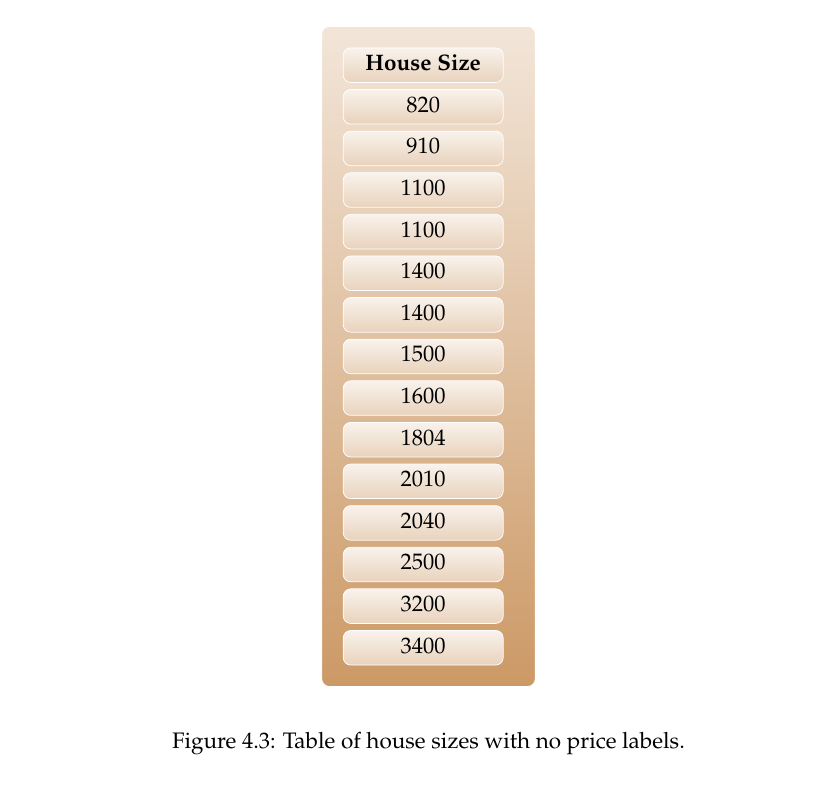

Lo unico que se me ocurre que podemos hacer es agrupar datos.
Uno podria generar una grafica de distribucion de areas de las casas.



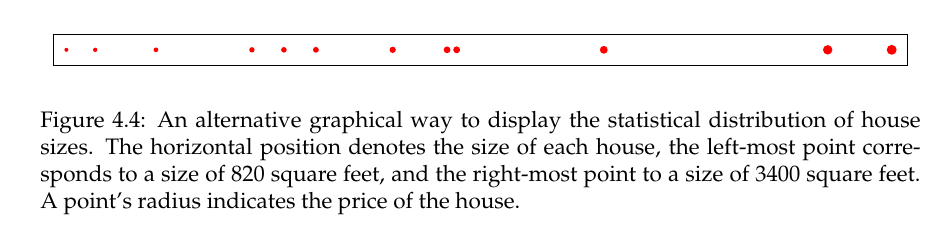

El primer **hiperparametro** importante es $k$ donde $k$
es el numero de "clusters".

En la proxima clase comenzamos con el metodo llamado
**k-means**, para buscar agrupacion de datos.